# A. Import Library

In [1]:
# Import Library

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# B. Data Loading & Preprocessing

For this task, we use dataset whether a person has diabetes or not.

Source dataset : [link](https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D5AM%20-%20Model%20Evaluation.csv)

In [2]:
# Data Loading

df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D5AM%20-%20Model%20Evaluation.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Check Columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Check Distribution of Target Class

df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
# Split between Features and Target
X = df.drop("Outcome", axis=1)
y = df['Outcome']

# Split between Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=46)

print('Train Size : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (652,)
Test Size  :  (116,)


In [6]:
# Check Class Distribution in Test-Set

import numpy as np
np.array(np.unique(y_test, return_counts=True)).T

array([[ 0, 79],
       [ 1, 37]])

In [7]:
# Feature Scaling using StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# C. Model Definition & Model Training

Let's use a simple algorithm to solve this case. We will use `K-Nearest Neighbors (KNN)` with `n_neighbors=7`.

In [8]:
# Model Training using KNN

knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

# D. Model Evaluation

In [9]:
# Model Prediction

y_pred_train_knn = knn_7.predict(X_train_scaled)
y_pred_test_knn = knn_7.predict(X_test_scaled)

## D.1. Confusion Matrix & Classification Report (with default threshold=0.5)

In [10]:
# Confusion Matrix - Train Set

from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train_knn)

print('Confusion Matrix : \n', cm_train)

Confusion Matrix : 
 [[371  50]
 [ 82 149]]


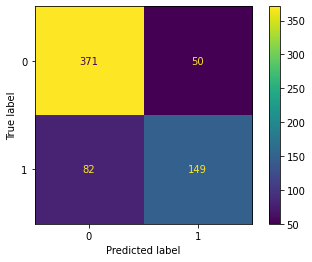

In [11]:
# Confusion Matrix Display - Train Set

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm_train).plot()

In [12]:
# Model Evaluation - Train Set

print(classification_report(y_train, y_pred_train_knn))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       421
           1       0.75      0.65      0.69       231

    accuracy                           0.80       652
   macro avg       0.78      0.76      0.77       652
weighted avg       0.79      0.80      0.79       652



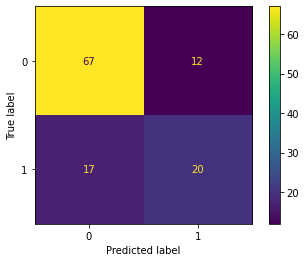

In [13]:
# Confusion Matrix - Test Set
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test, y_pred_test_knn)
ConfusionMatrixDisplay(cm_test).plot()

In [14]:
# Model Evaluation - Test Set

print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        79
           1       0.62      0.54      0.58        37

    accuracy                           0.75       116
   macro avg       0.71      0.69      0.70       116
weighted avg       0.74      0.75      0.74       116



In [15]:
# Get Precision Score and Recall Score

from sklearn.metrics import precision_score, recall_score

print('Precision : ', precision_score(y_test, y_pred_test_knn))
print('Recall    : ', recall_score(y_test, y_pred_test_knn))

Precision :  0.625
Recall    :  0.5405405405405406


## D.2. Classification Report (with threshold=0.8)

Let's see performance of the model with threshold `0.8`.

In [16]:
# Change Threshold

import numpy as np

y_pred_new_proba = knn_7.predict_proba(X_test_scaled)
y_pred_new_test = np.where(y_pred_new_proba[:,1] >= 0.8, 1, 0)

print(classification_report(y_test, y_pred_new_test))
print('Precision : ', precision_score(y_test, y_pred_new_test))
print('Recall    : ', recall_score(y_test, y_pred_new_test))

              precision    recall  f1-score   support

           0       0.70      0.96      0.81        79
           1       0.57      0.11      0.18        37

    accuracy                           0.69       116
   macro avg       0.63      0.54      0.50       116
weighted avg       0.66      0.69      0.61       116

Precision :  0.5714285714285714
Recall    :  0.10810810810810811


## D.3. Train Another Model of KNN with `n_neighbors=3`

In [17]:
# Model Training using KNN with n_neighbors=3
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train_scaled, y_train)

# Model Prediction
y_pred_train_knn = knn_3.predict(X_train_scaled)
y_pred_test_knn = knn_3.predict(X_test_scaled)

# Model Evaluation - Test Set
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        79
           1       0.60      0.57      0.58        37

    accuracy                           0.74       116
   macro avg       0.70      0.70      0.70       116
weighted avg       0.74      0.74      0.74       116



## D.4. ROC-AUC

In [18]:
# Get FPR, TPR, and AUC Score from KNN(n_neighbors=7)

from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba_knn_7 = knn_7.predict_proba(X_test_scaled)[:, 1]
fpr_knn_7, tpr_knn_7, _ = roc_curve(y_test, y_pred_proba_knn_7)
auc_knn_7 = roc_auc_score(y_test, y_pred_proba_knn_7)

print('AUC Score : ', auc_knn_7)

AUC Score :  0.7882312692439275


In [19]:
# Check FPR and TPR of KNN(n_neighbors=7)

import pandas as pd

pd.DataFrame({'FPR': fpr_knn_7, 'TPR': tpr_knn_7})

,FPR,TPR
0,0.000000,0.000000
1,0.012658,0.027027
2,0.037975,0.108108
3,0.101266,0.378378
4,0.151899,0.540541
5,0.215190,0.675676
6,0.417722,0.837838
7,0.645570,0.972973
8,1.000000,1.000000


In [20]:
# Get FPR, TPR, and AUC Score from KNN(n_neighbors=3)

from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba_knn_3 = knn_3.predict_proba(X_test_scaled)[:, 1]
fpr_knn_3, tpr_knn_3, _ = roc_curve(y_test, y_pred_proba_knn_3)
auc_knn_3 = roc_auc_score(y_test, y_pred_proba_knn_3)

print('AUC Score : ', auc_knn_3)

AUC Score :  0.7483749572357169


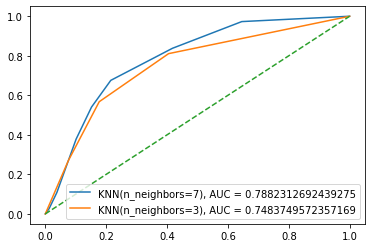

In [21]:
# Plot ROC-AUC Curve

plt.figure(0).clf()
plt.plot(fpr_knn_7, tpr_knn_7, label='KNN(n_neighbors=7), AUC = ' + str(auc_knn_7))
plt.plot(fpr_knn_3, tpr_knn_3, label='KNN(n_neighbors=3), AUC = ' + str(auc_knn_3))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=0)